# 2 - Statistics and Analysis

In [ ]:
df['explicit'] = df['explicit'].astype(int)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


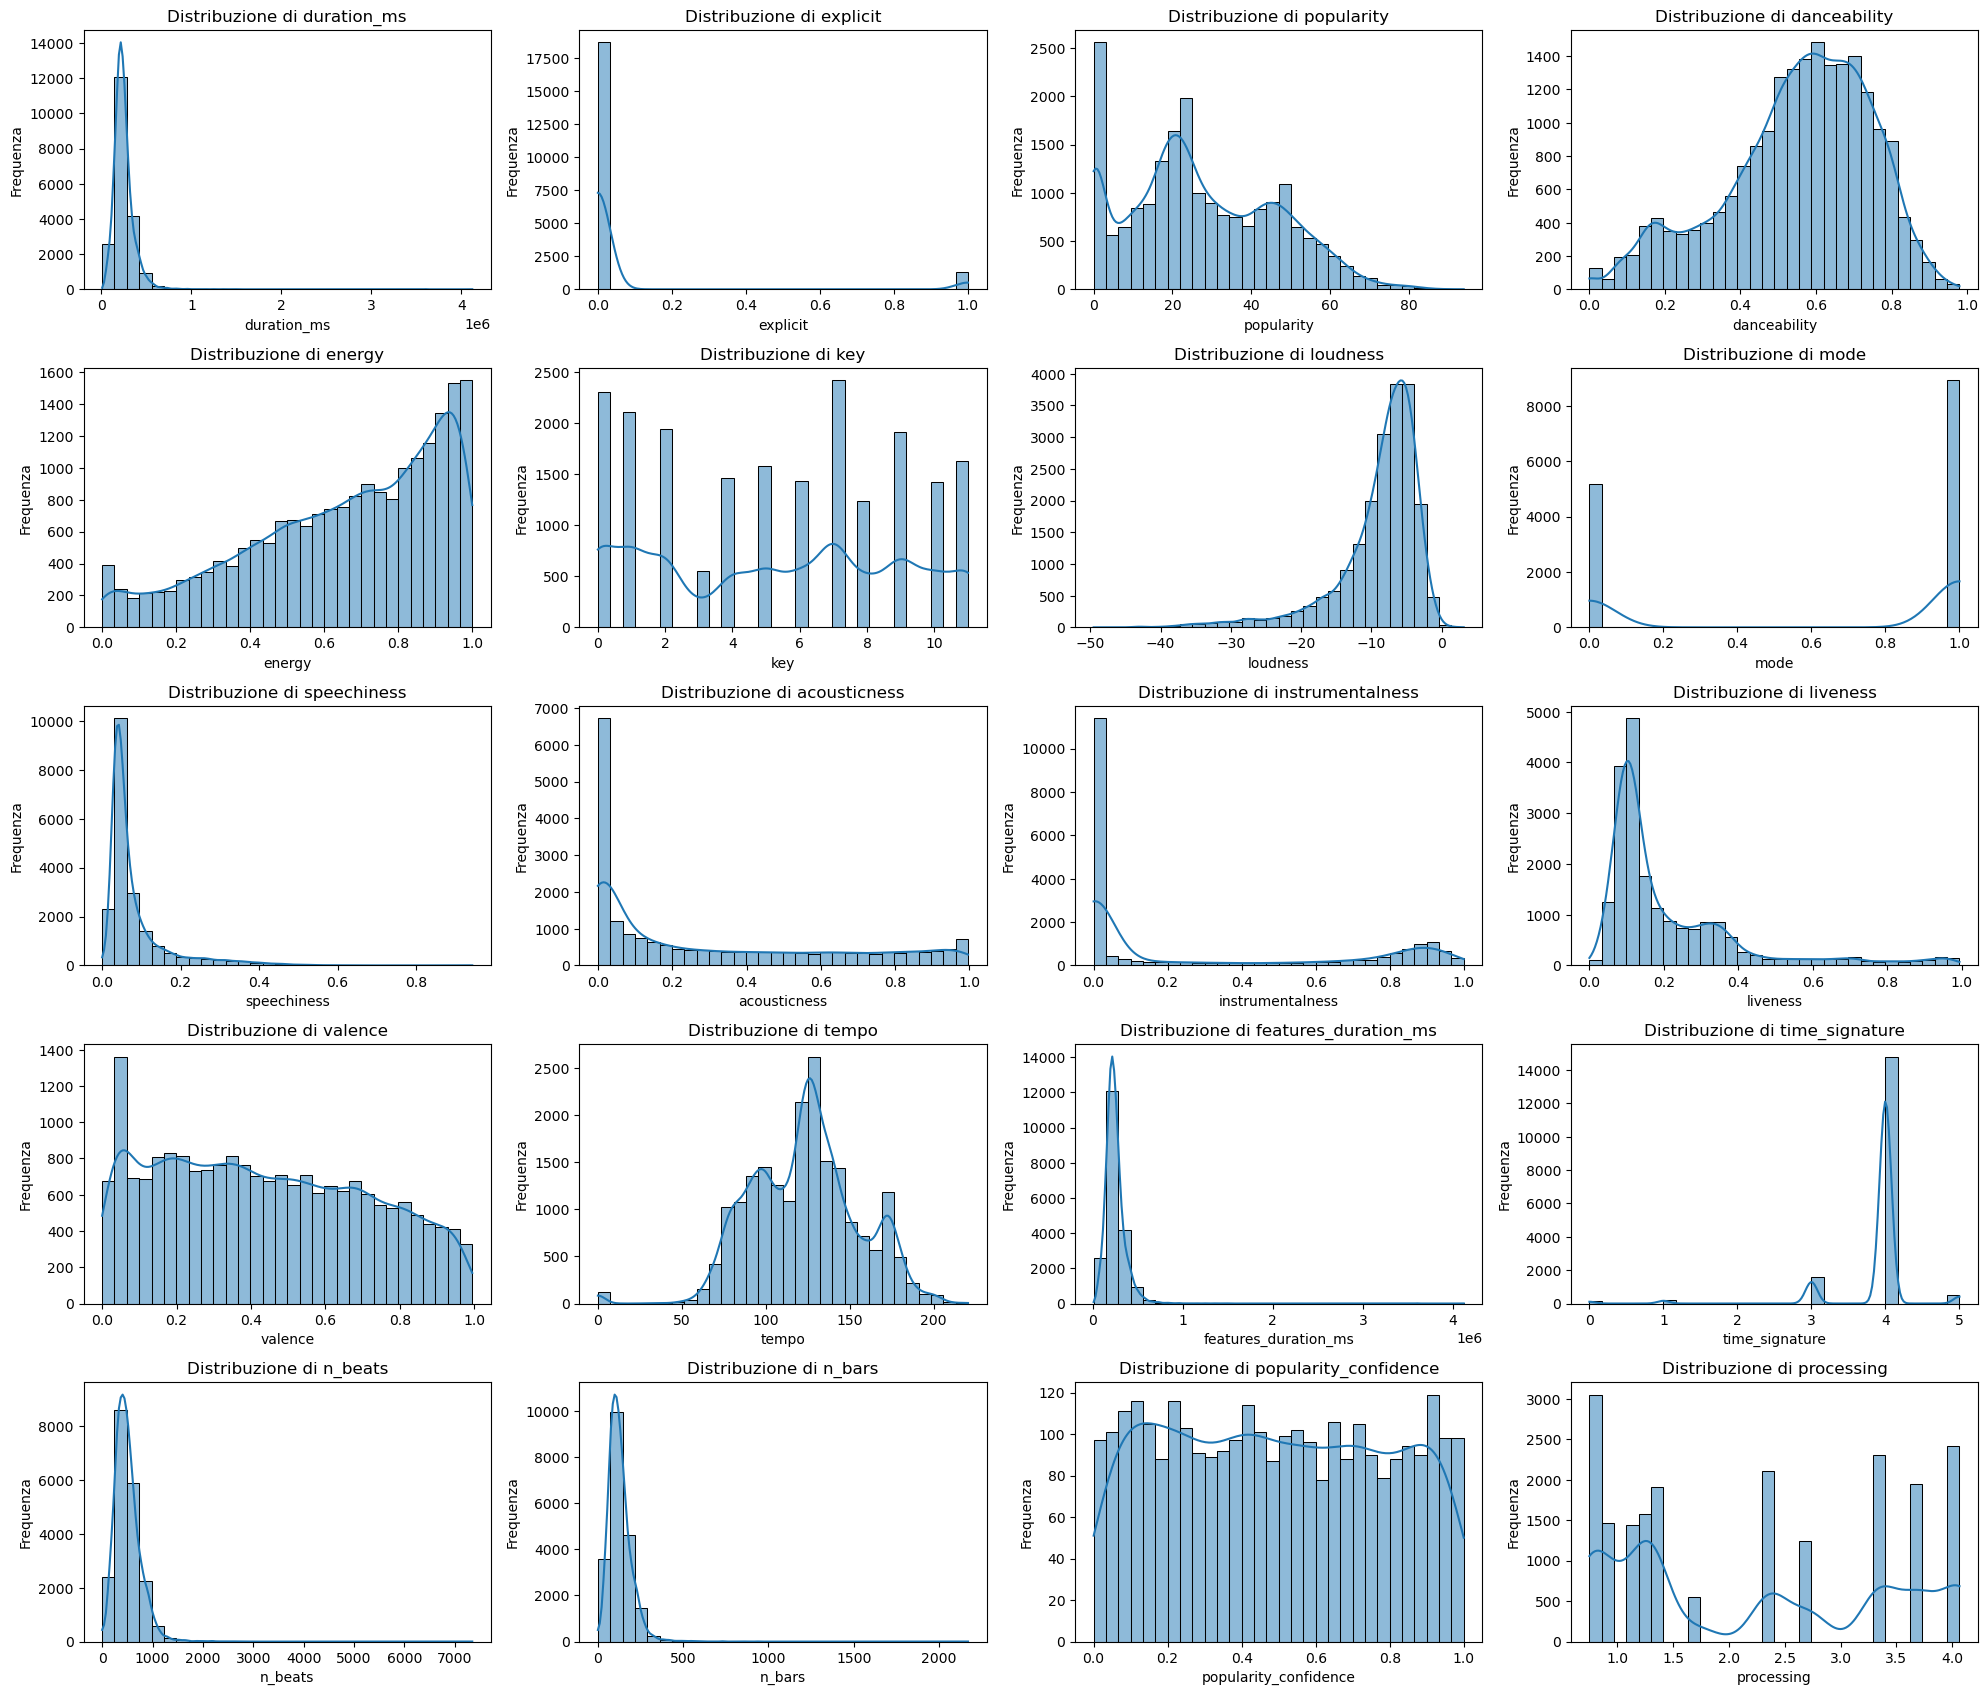

In [ ]:
plt.figure(figsize=(20, 20))

# Loop attraverso le colonne delle feature
for i, column in enumerate(df._get_numeric_data(), 1):
    plt.subplot(6, 4, i)  # Organizza i grafici in una griglia 3x2
    
    sns.histplot(data=df, x=column, bins=30, kde=True)

    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()


In [ ]:
df['explicit'].value_counts()

explicit
0    18699
1     1301
Name: count, dtype: int64

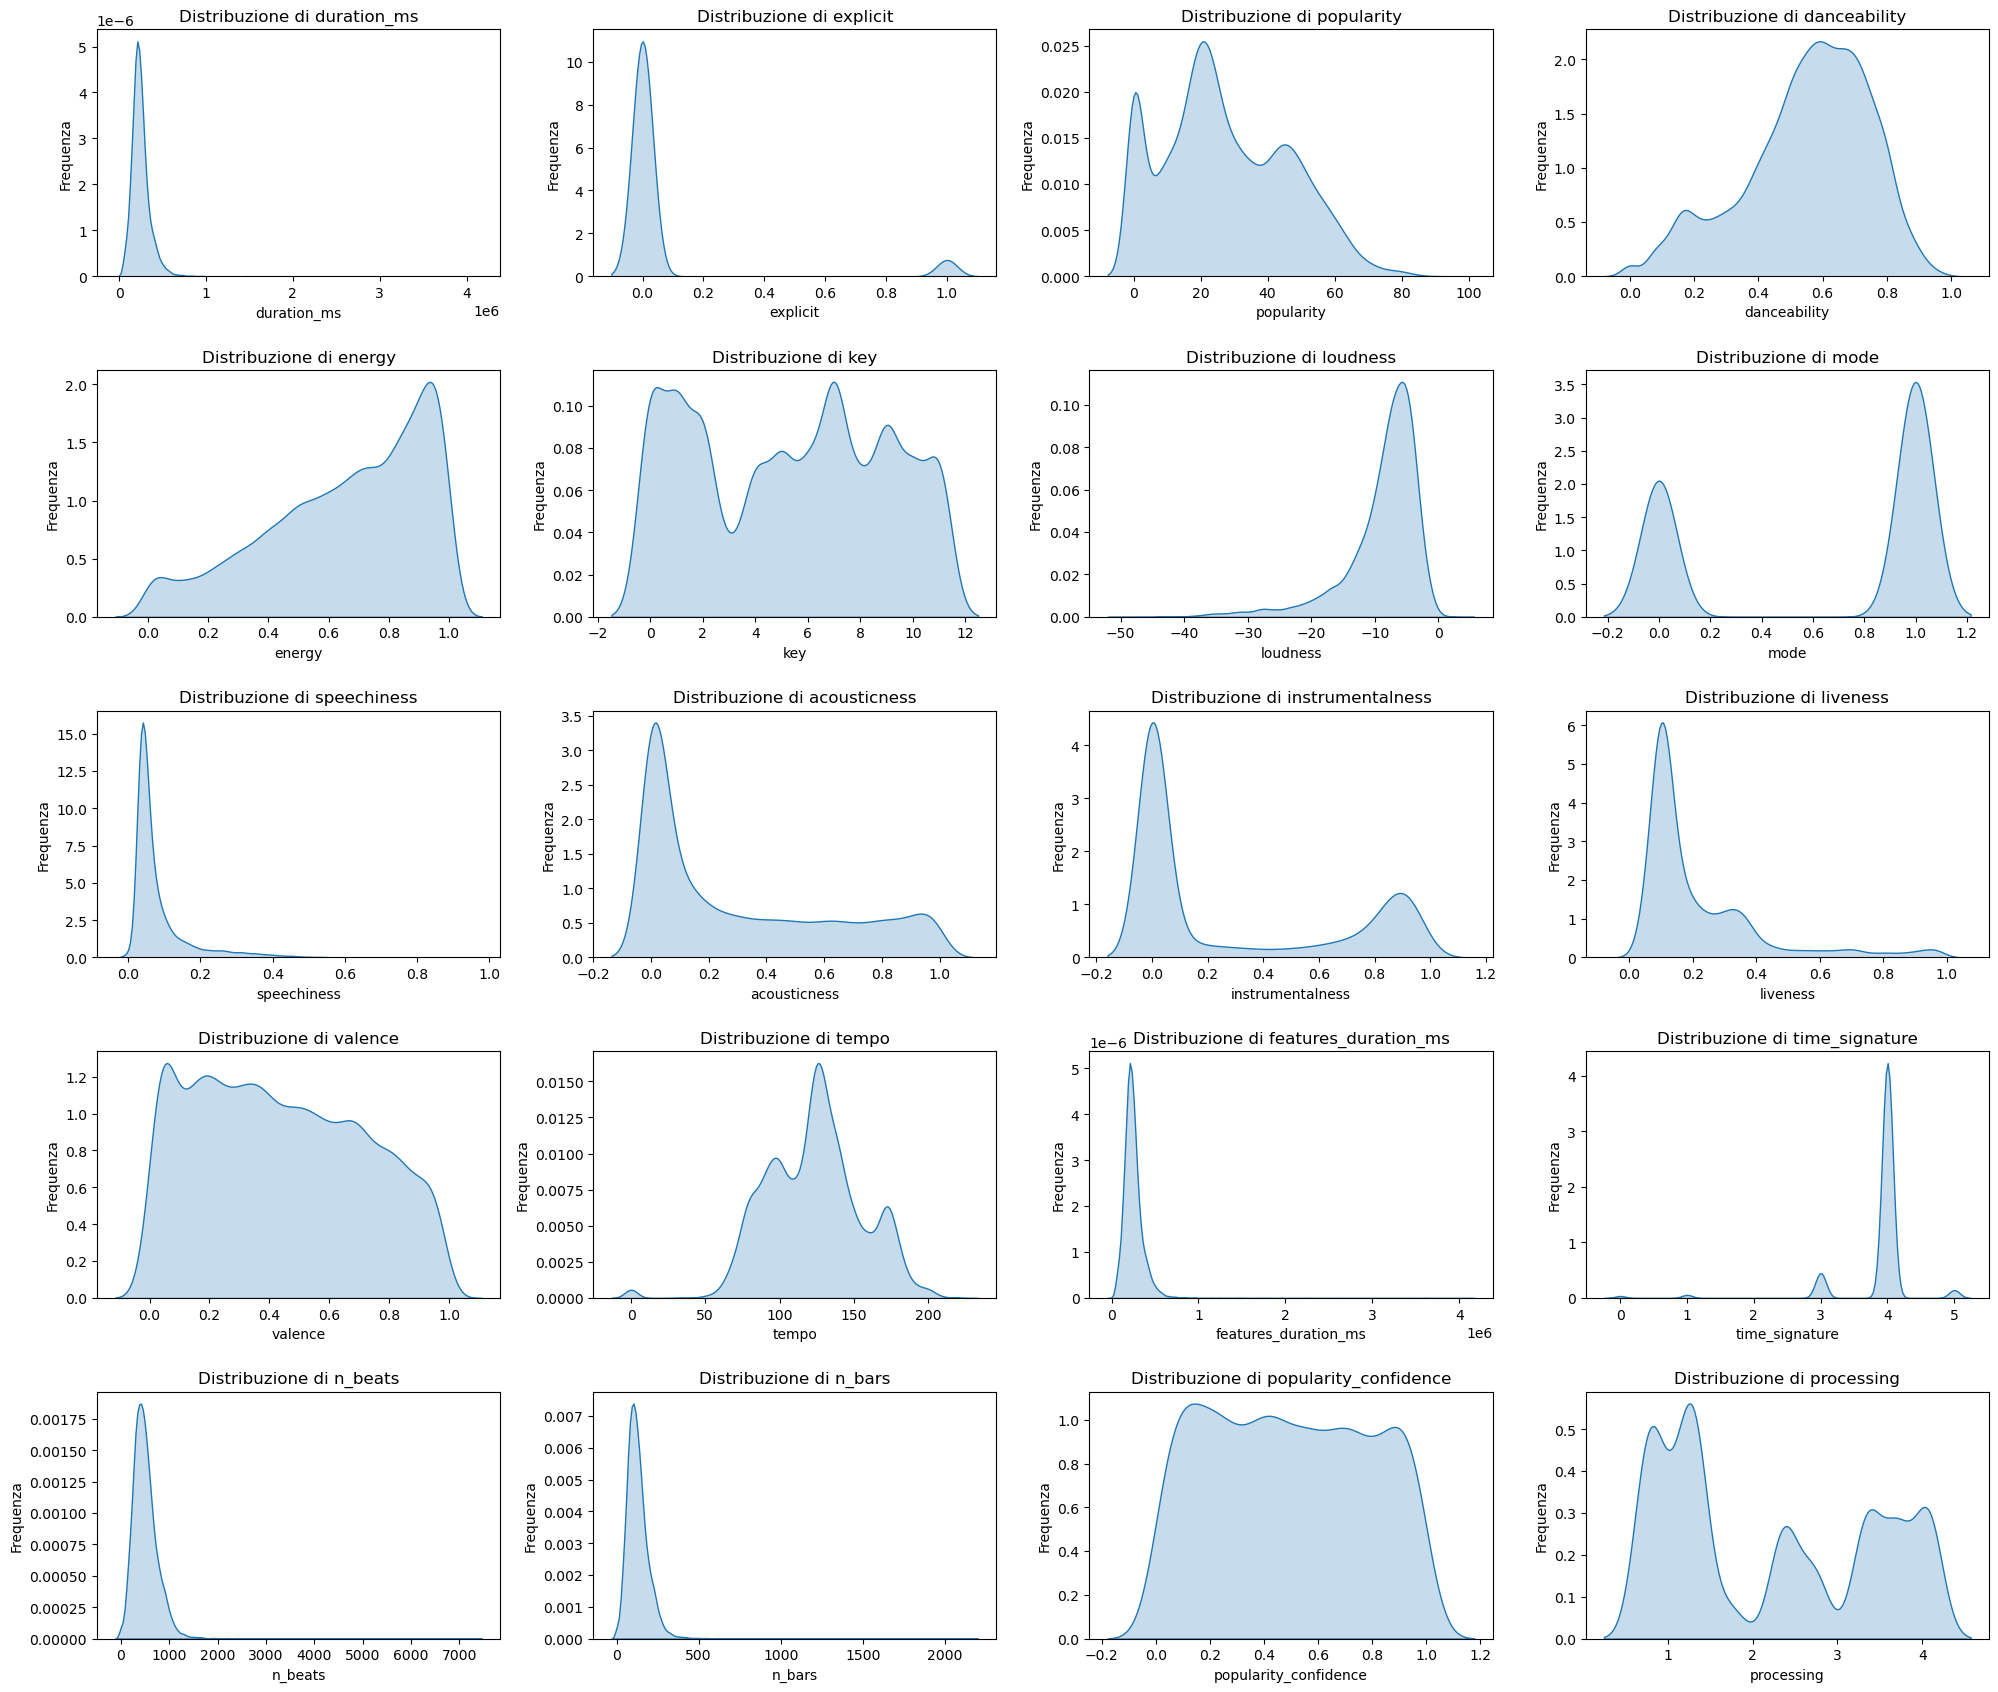

In [ ]:
plt.figure(figsize=(20, 20))

# Loop attraverso le colonne delle feature
for i, column in enumerate(df._get_numeric_data(), 1):
    plt.subplot(6, 4, i)  # Organizza i grafici in una griglia 3x2
    
    sns.kdeplot(data=df, x=column, fill=True)

    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'explicit'}, xlabel='genre'>

<Figure size 2000x2000 with 0 Axes>

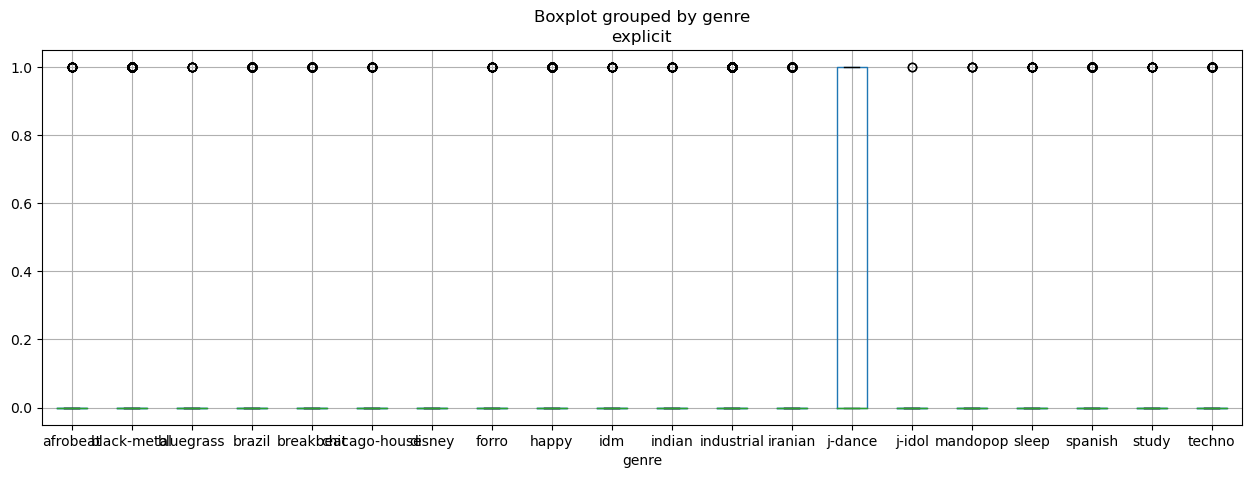

In [ ]:
plt.figure(figsize=(20, 20))
df.boxplot(column=['explicit'], by='genre', figsize=(15,5))

<Figure size 2000x600 with 0 Axes>

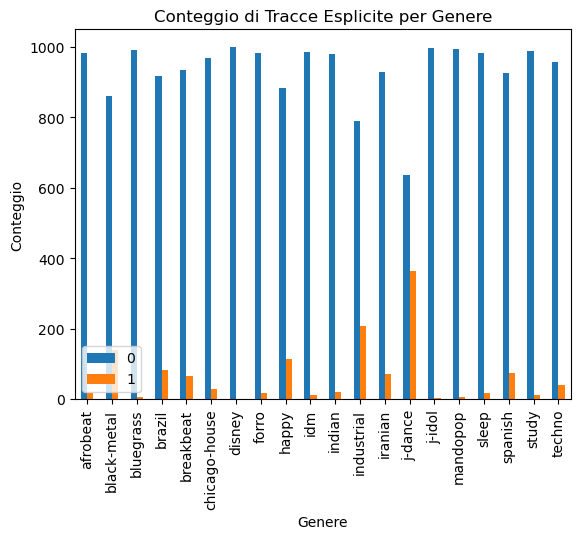

In [ ]:
# Calcola il conteggio delle tracce "explicit" per ogni genere
explicit_counts = df.groupby('genre')['explicit'].value_counts().unstack()

# Crea un grafico a barre
plt.figure(figsize=(20, 6))
explicit_counts.plot(kind='bar')

# Aggiungi titolo e etichette
plt.title('Conteggio di Tracce Esplicite per Genere')
plt.xlabel('Genere')
plt.ylabel('Conteggio')
plt.legend(loc='lower left')

# Mostra il grafico
plt.show()

In [ ]:
genre_locks = sorted(df['genre'].unique())
genre_locs_mapping = dict(zip(genre_locks, range(1, len(genre_locks)+1)))
genre_locs_mapping

{'afrobeat': 1,
 'black-metal': 2,
 'bluegrass': 3,
 'brazil': 4,
 'breakbeat': 5,
 'chicago-house': 6,
 'disney': 7,
 'forro': 8,
 'happy': 9,
 'idm': 10,
 'indian': 11,
 'industrial': 12,
 'iranian': 13,
 'j-dance': 14,
 'j-idol': 15,
 'mandopop': 16,
 'sleep': 17,
 'spanish': 18,
 'study': 19,
 'techno': 20}

In [ ]:
df['genre_val'] = df['genre'].map(genre_locs_mapping).astype(int)
df[['genre', 'genre_val']].head()

,genre,genre_val
0,j-dance,14
1,iranian,13
2,black-metal,2
3,bluegrass,3
4,happy,9


In [ ]:
df._get_numeric_data().corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre_val
duration_ms,1.000000,-0.047607,-0.072312,-0.078600,0.100502,0.016681,0.039237,-0.027038,-0.077211,-0.180985,0.083924,-0.018644,-0.142754,0.045732,0.999919,0.016930,0.847462,0.843725,-0.000000,-0.006209,-0.110408
explicit,-0.047607,1.000000,-0.011718,0.061494,0.122864,-0.001349,0.129793,-0.040141,0.294278,-0.110208,-0.123562,0.001187,0.006894,0.017938,-0.047580,0.055375,-0.038315,-0.038780,0.018268,-0.006031,0.011480
popularity,-0.072312,-0.011718,1.000000,0.054973,-0.051810,-0.012131,0.056271,0.074843,-0.094967,0.075627,-0.275946,0.026435,0.074666,-0.017708,-0.072317,-0.001495,-0.077100,-0.082421,0.009377,0.004975,0.088572
danceability,-0.078600,0.061494,0.054973,1.000000,0.198275,0.038234,0.386826,-0.072575,0.119496,-0.202356,-0.208910,-0.173983,0.559879,0.091857,-0.078610,0.299366,-0.031328,-0.068145,0.008974,-0.032837,0.001559
energy,0.100502,0.122864,-0.051810,0.198275,1.000000,0.054892,0.720242,-0.081768,0.142695,-0.701616,-0.202401,0.192670,0.284200,0.329146,0.100470,0.208413,0.241665,0.208633,0.036457,-0.037902,-0.146545
key,0.016681,-0.001349,-0.012131,0.038234,0.054892,1.000000,0.047223,-0.165945,0.017739,-0.048517,-0.004216,-0.003978,0.031765,0.016771,0.016788,0.032313,0.024106,0.019182,0.029850,-0.488170,-0.020807
loudness,0.039237,0.129793,0.056271,0.386826,0.720242,0.047223,1.000000,-0.035492,0.110348,-0.548943,-0.450204,0.046685,0.375547,0.309342,0.039224,0.256644,0.166997,0.133674,0.032527,-0.021459,-0.136223
mode,-0.027038,-0.040141,0.074843,-0.072575,-0.081768,-0.165945,-0.035492,1.000000,-0.065983,0.087008,-0.077858,0.011356,-0.011836,-0.003164,-0.027160,-0.024343,-0.028279,-0.025111,-0.010861,0.268946,-0.009101
speechiness,-0.077211,0.294278,-0.094967,0.119496,0.142695,0.017739,0.110348,-0.065983,1.000000,-0.089481,-0.113752,0.044510,0.060853,0.066165,-0.077258,0.081659,-0.043300,-0.040299,0.024718,-0.022997,0.036812
acousticness,-0.180985,-0.110208,0.075627,-0.202356,-0.701616,-0.048517,-0.548943,0.087008,-0.089481,1.000000,0.095010,-0.077521,-0.133644,-0.241710,-0.180902,-0.145835,-0.281104,-0.247632,-0.033070,0.025218,0.102903


In [ ]:

df._get_numeric_data().corr(method="spearman", min_periods = 1).style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre_val
duration_ms,1.000000,-0.066230,-0.070809,-0.070849,0.171562,0.022829,0.068761,-0.026164,-0.084549,-0.299190,0.075533,-0.063014,-0.141989,0.098192,0.999885,0.040895,0.840955,0.833957,-0.002020,-0.006363,-0.142096
explicit,-0.066230,1.000000,-0.018397,0.058423,0.119992,-0.000363,0.145107,-0.040141,0.254304,-0.104331,-0.130473,0.018702,0.010946,0.008207,-0.066196,0.066618,-0.045985,-0.048587,0.018444,-0.007508,0.011480
popularity,-0.070809,-0.018397,1.000000,0.036967,-0.080005,-0.010527,0.069307,0.082727,-0.168693,0.137388,-0.324587,0.030129,0.087826,-0.003354,-0.070803,0.013786,-0.066853,-0.072918,0.006140,0.007697,0.089356
danceability,-0.070849,0.058423,0.036967,1.000000,0.060913,0.034226,0.159985,-0.084346,0.132246,-0.075625,-0.154232,-0.186070,0.542535,-0.004253,-0.070889,0.213626,-0.044049,-0.072856,0.003093,-0.044858,0.024055
energy,0.171562,0.119992,-0.080005,0.060913,1.000000,0.050818,0.719046,-0.072456,0.343336,-0.662439,-0.077470,0.187966,0.215126,0.299673,0.171511,0.148438,0.296495,0.273824,0.035594,-0.042562,-0.134693
key,0.022829,-0.000363,-0.010527,0.034226,0.050818,1.000000,0.033603,-0.163201,0.031709,-0.047036,0.007100,0.003419,0.031615,0.017514,0.022919,0.034705,0.030822,0.026120,0.027957,-0.472233,-0.020223
loudness,0.068761,0.145107,0.069307,0.159985,0.719046,0.033603,1.000000,-0.024395,0.208414,-0.468754,-0.407721,0.111124,0.326213,0.268810,0.068729,0.178619,0.184952,0.160647,0.017814,-0.022141,-0.075546
mode,-0.026164,-0.040141,0.082727,-0.084346,-0.072456,-0.163201,-0.024395,1.000000,-0.113453,0.079435,-0.099275,0.016196,-0.010194,0.003832,-0.026302,-0.028267,-0.024876,-0.022294,-0.010458,0.273574,-0.009034
speechiness,-0.084549,0.254304,-0.168693,0.132246,0.343336,0.031709,0.208414,-0.113453,1.000000,-0.237312,0.006666,0.055082,0.054280,0.103958,-0.084606,0.088396,0.002966,-0.000770,0.043481,-0.046389,0.030308
acousticness,-0.299190,-0.104331,0.137388,-0.075625,-0.662439,-0.047036,-0.468754,0.079435,-0.237312,1.000000,-0.090518,-0.055724,-0.036716,-0.235091,-0.299062,-0.123955,-0.374371,-0.353409,-0.027947,0.030611,0.132680


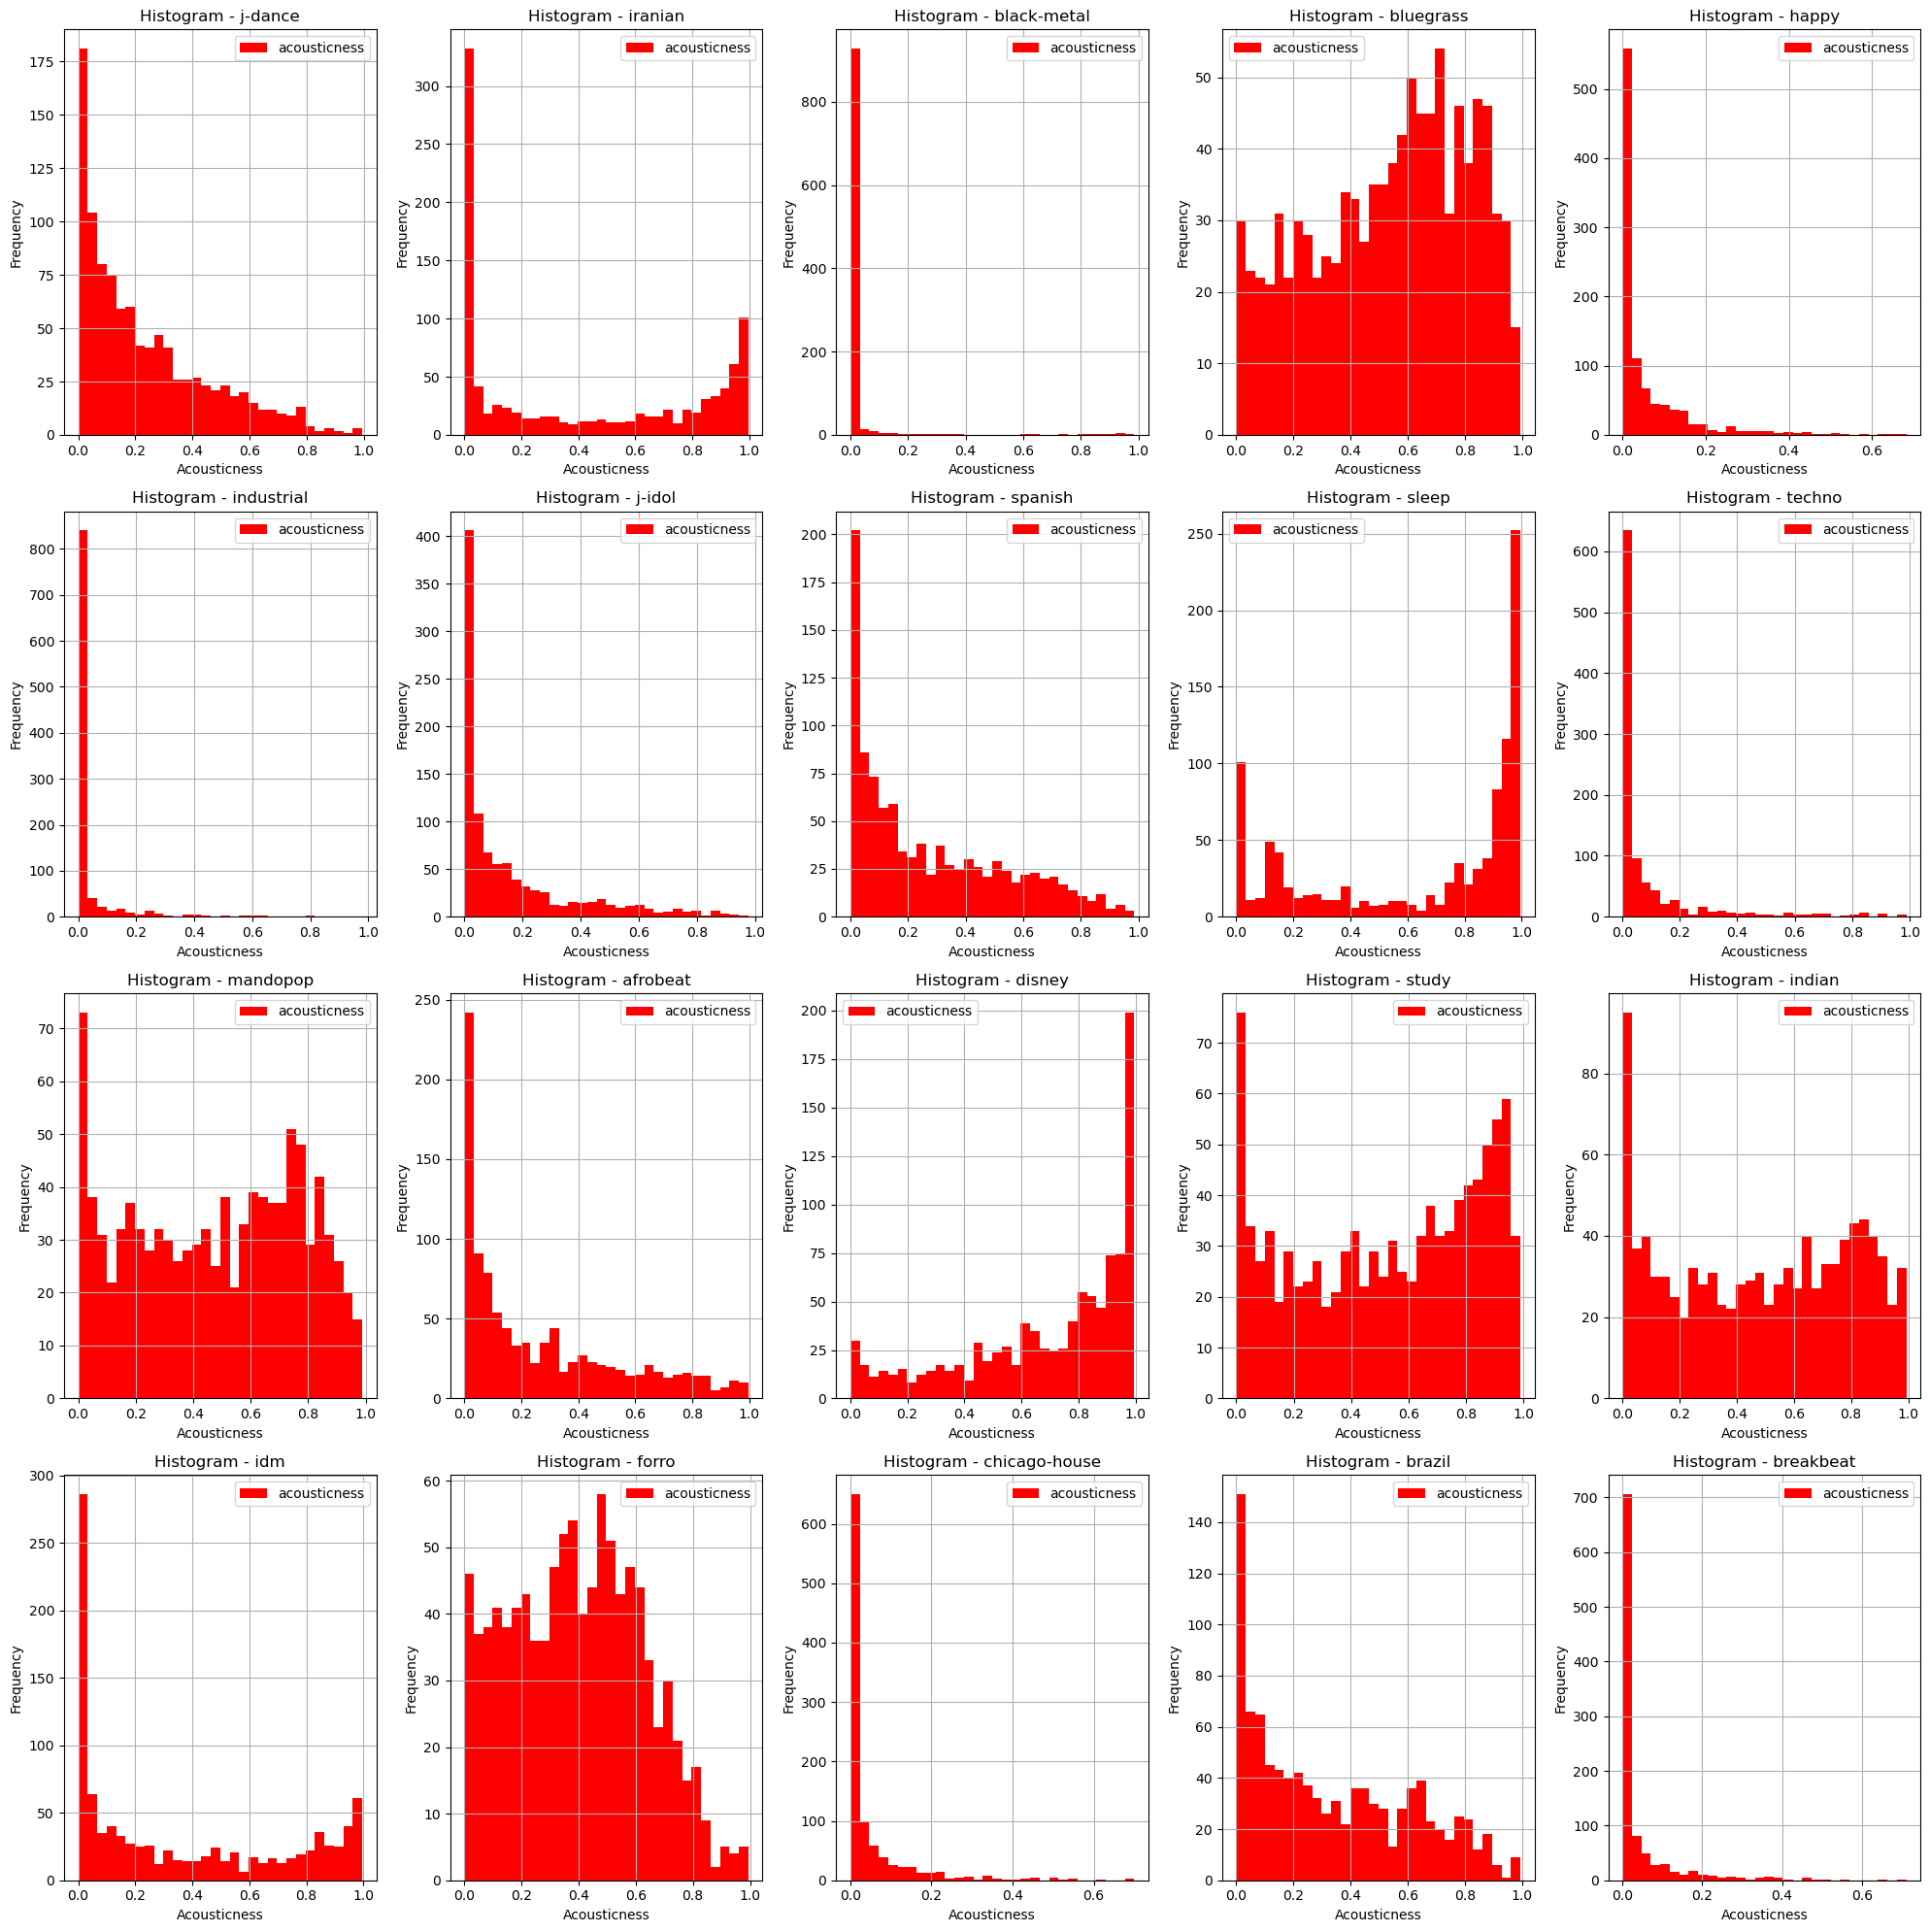

In [ ]:
plt.figure(figsize=(20, 20))

for i, genre in enumerate(df['genre'].unique(), 1):
    plt.subplot(4, 5, i)
    df[df['genre'] == genre]['acousticness'].hist(bins=30, color='red', label='acousticness')
    plt.legend()
    plt.title(f'Histogram - {genre}')
    plt.xlabel('Acousticness')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

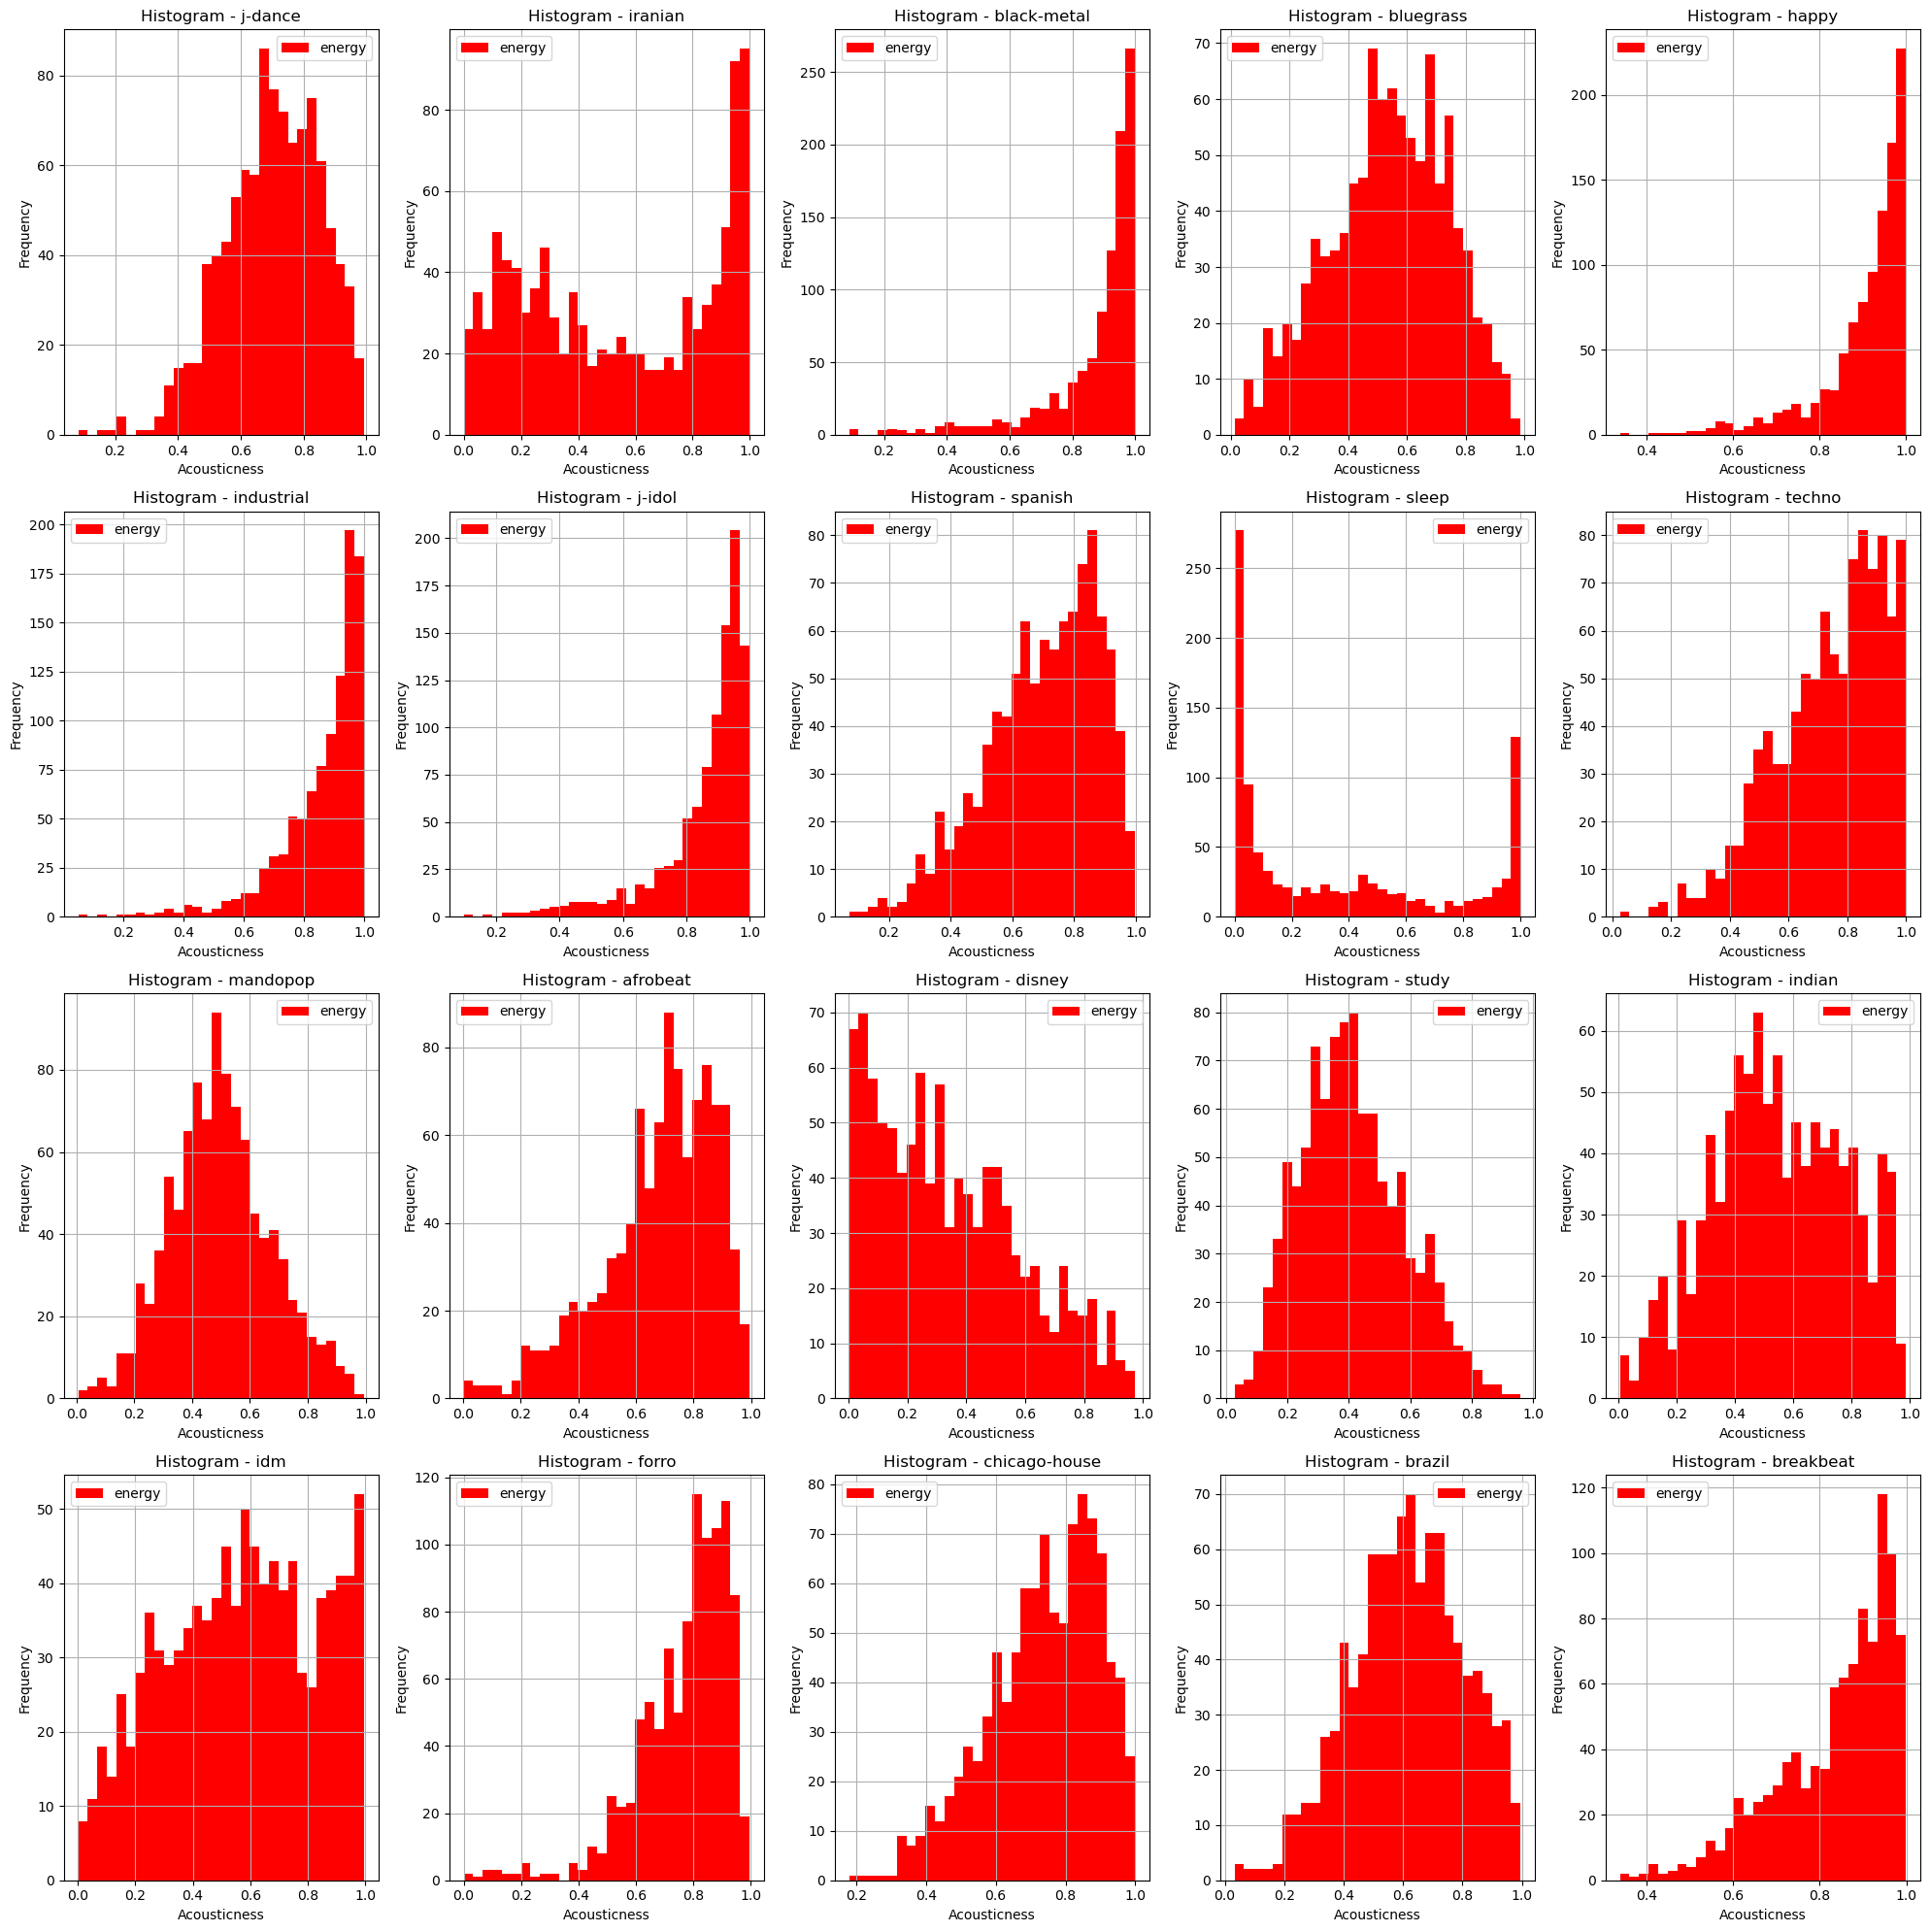

In [ ]:
plt.figure(figsize=(20, 20))

for i, genre in enumerate(df['genre'].unique(), 1):
    plt.subplot(4, 5, i)
    df[df['genre'] == genre]['energy'].hist(bins=30, color='red', label='energy')
    plt.legend()
    plt.title(f'Histogram - {genre}')
    plt.xlabel('Acousticness')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

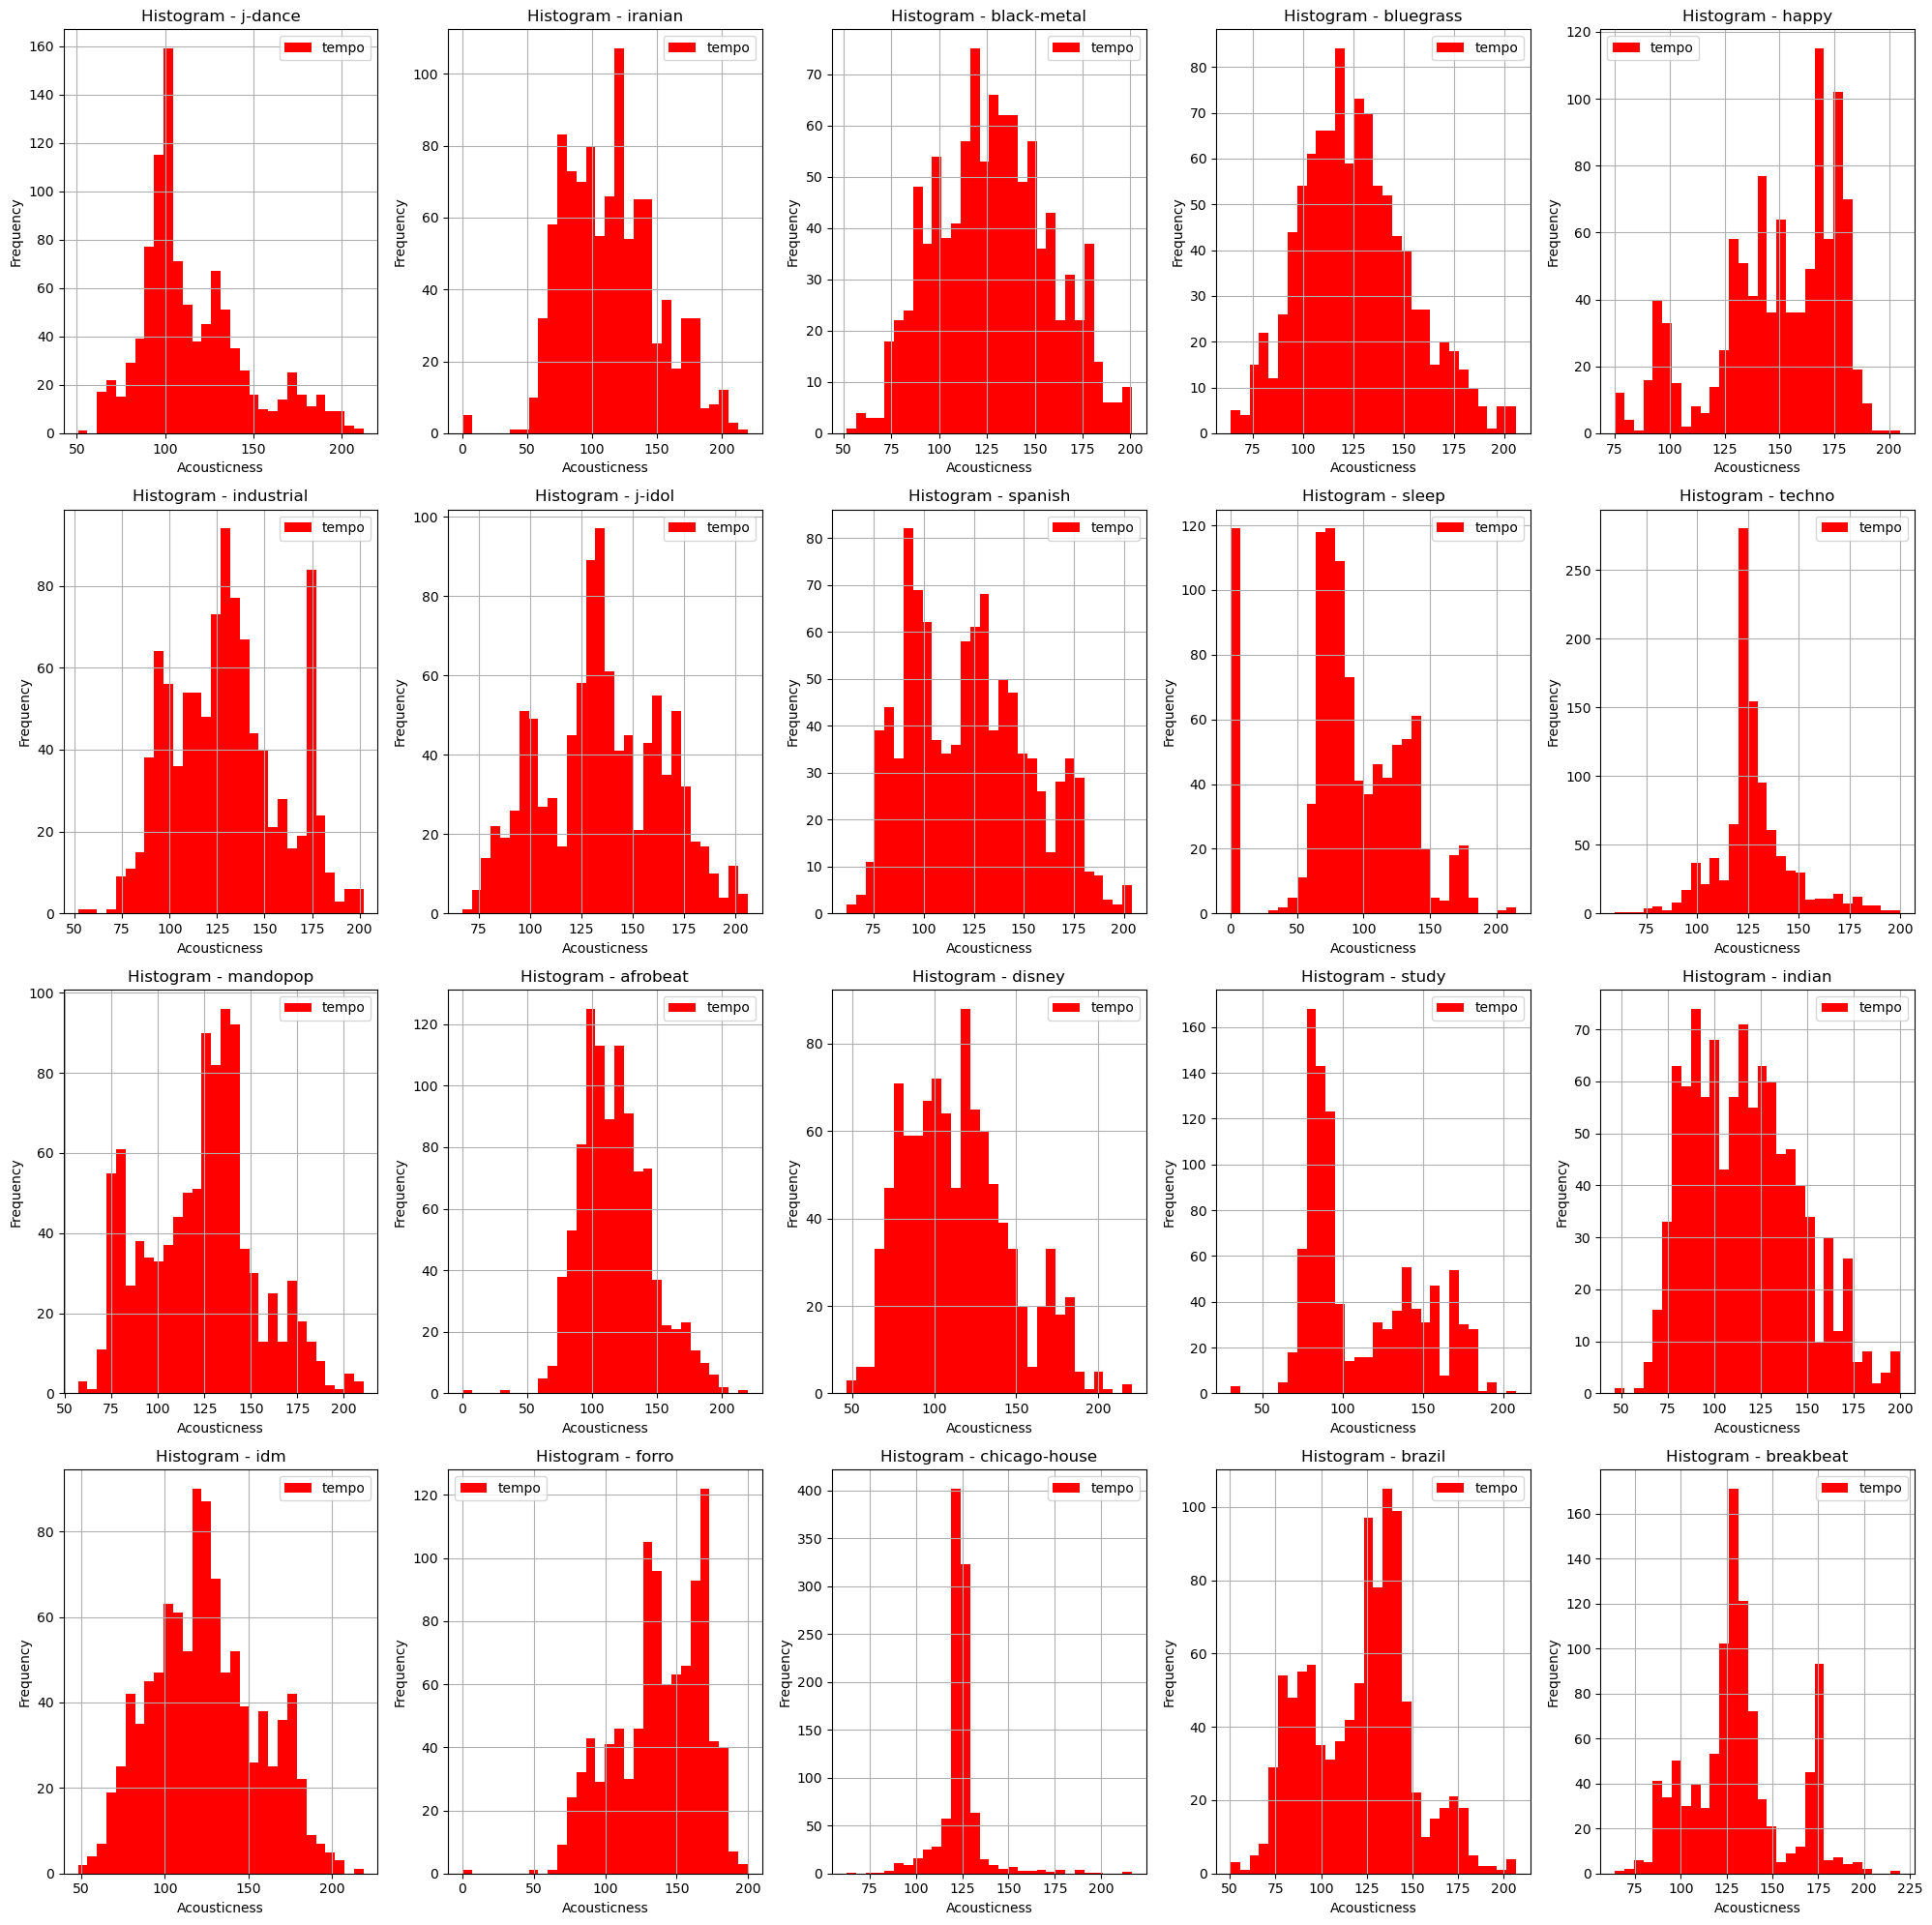

In [ ]:
plt.figure(figsize=(20, 20))

for i, genre in enumerate(df['genre'].unique(), 1):
    plt.subplot(4, 5, i)
    df[df['genre'] == genre]['tempo'].hist(bins=30, color='red', label='tempo')
    plt.legend()
    plt.title(f'Histogram - {genre}')
    plt.xlabel('Acousticness')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

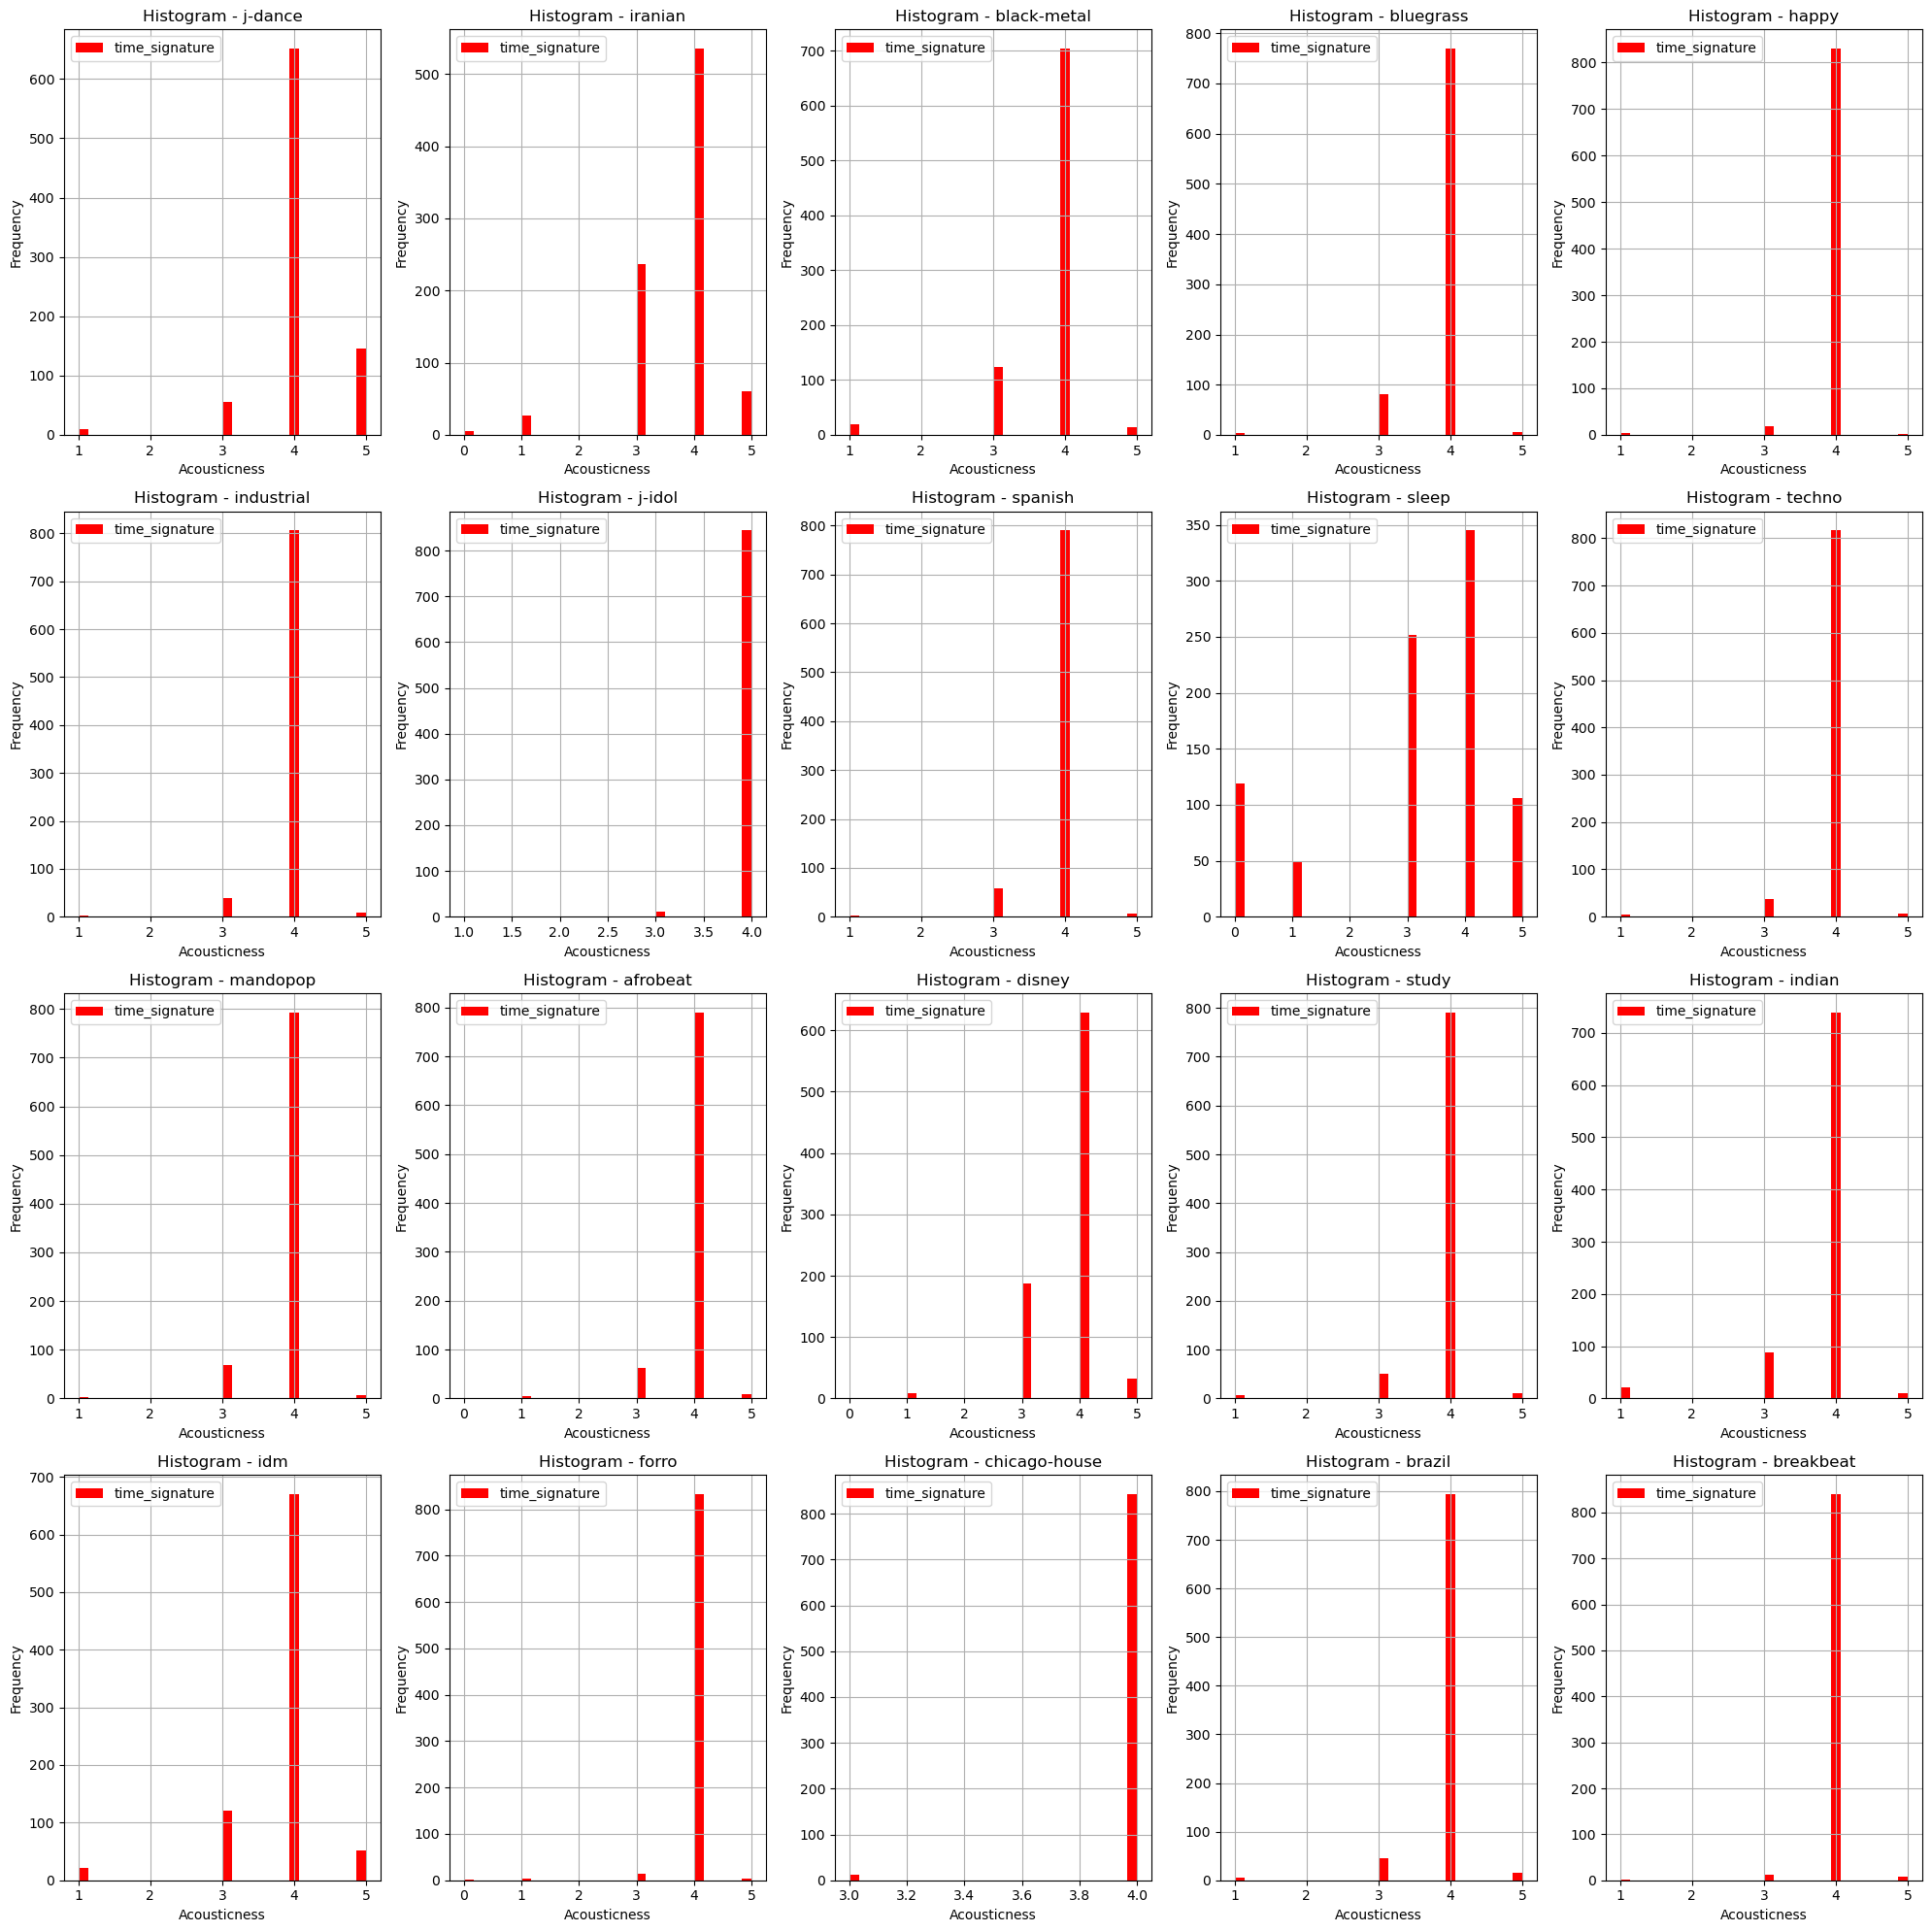

In [ ]:
plt.figure(figsize=(20, 20))

for i, genre in enumerate(df['genre'].unique(), 1):
    plt.subplot(4, 5, i)
    df[df['genre'] == genre]['time_signature'].hist(bins=30, color='red', label='time_signature')
    plt.legend()
    plt.title(f'Histogram - {genre}')
    plt.xlabel('Acousticness')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [ ]:
df['speechiness'].describe()

count    20000.000000
mean         0.083696
std          0.086923
min          0.000000
25%          0.037100
50%          0.050900
75%          0.088200
max          0.943000
Name: speechiness, dtype: float64

In [ ]:
from scipy.stats import iqr

def identify_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_value = iqr(data)
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value

    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Esempio di utilizzo
feature_data = df['duration_ms']
outliers = identify_outliers(feature_data)

# Visualizza gli outliers
print("Gli outliers sono:")
print(df[outliers])

Gli outliers sono:
                                                  name  duration_ms  explicit  \
31                                            H.O.P.E.       569782         0   
34                         Get Get Down - Original Mix       551999         0   
59          Down 4 U - Extended Version; 2017 Remaster       507832         0   
70                                 A System Of Mirrors       459389         0   
109                         Close - Derrick Carter Mix       759400         0   
...                                                ...          ...       ...   
19942                                        Se + F=Ph       688000         0   
19965                                       The Planet       460000         0   
19973                                         Hidden T       468822         0   
19980  Papua New Guinea - Andrew Weatherall Single Mix       584026         0   
19982                                    Olanlar Olmuş       487866         0   

       p